<a href="https://colab.research.google.com/github/takatoshiinaoka/pattern_recognition/blob/main/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%984.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パターン認識
## 第4回：パターン認識(3章後半)


### 各層における伝達信号の実装

In [ ]:
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B1 = np.array([0.1, 0.2, 0.3])
B2 = np.array([0.1, 0.2])
B3 = np.array([0.1, 0.2])

print(X.shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(B1.shape)
print(B2.shape)
print(B3.shape)
print()

#シグモイド関数
def sigmoid(x):
  return 1/(1+np.exp(-x))

#恒等関数
def identity_function(x): 
  return x  #今回は何の計算もしていない[目的によって変わる]

#1層目の計算
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1) 
print(str(A1) +"\n"+ str(Z1), end="\n\n")

#2層目の計算
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2) 
print(str(A2) +"\n"+ str(Z2), end="\n\n")

#3層目の計算
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) 
print(str(A3) +"\n"+ str(Y), end="\n\n")

(2,)
(2, 3)
(3, 2)
(2, 2)
(3,)
(2,)
(2,)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]

[0.31682708 0.69627909]
[0.31682708 0.69627909]



### 実装まとめ

In [ ]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def identity_function(x): 
  return x  

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a
  return y

def init_network(): #重みとバイアスの初期化
  network = {} 
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network
  
def forwarod(network, x): #前向きの伝達情報. 後ろで,後ろ向きの学習がある.
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1) 
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2) 
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3) 

  return y

network = init_network()
x = np.array([1.0, 0.5])   #入力でーた
y = forwarod(network, x)  #出力データ
print(y)

[0.31682708 0.69627909]


### 出力層の設計
- 分類問題
  - データがどのクラスに属するか  
  例：写真の人物は男か？女か？
  - 活性化関数としてソフトマックス関数を使う　　

  ```
  def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y
  ```
- 回帰問題
  - データから,別の数値を予想  
  例：写真の人物の体重は？
  - 活性化関数として恒等関数を使う  
  
  ```
  def identity_function(x): 
    return x  
  ```

In [ ]:
import numpy as np

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a
  return y

a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### ソフトマックス関数の特徴
- オーバーフローに注意

In [ ]:
import numpy as np

def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a
  return y

a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### 出力層ニューロンの数
- 解くべき問題に応じて決める
- 例：手書きの数字を認識する
  - 数字は0~9の10個 = 10クラス

### 手書き数字認識
- 手書き数字画像を分類する  
ニューラルネットを作る
- 重みなどのパラメータは？
  - 実際は学習で求める
  - 今回は学習済みのパラメータを使用
- 認識処理(推論処理)はニューラルネットの順方向伝播  
forward propagation


### MNISTデータセット
- 手書き数字の有名なデータセット
- 0~9の数字画像
  - 訓練用画像：60,000枚
  - テスト用画像：10,000枚
  - 28×28ピクセルのグレー画像
  - 各ビクセルは0~255の値

### ニューラルネットワークの推論処理
- ニューラルネットの構成
  - 入力層：784ニューロン(28×28ピクセル)
  - 出力層：10ニューロン(0~9の10クラス)
  - 隠れ層：経験から決める(変更可)
    - 1つ目：50ニューロン 
    - 2つ目：100ニューロン

カレントワーキングディレクトリは[/content]です
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
5
(784,)
(28, 28)
AxesImage(54,36;334.8x217.44)


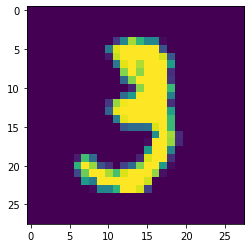

In [ ]:
import sys, os
sys.path.append(os.pardir)
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle

print("カレントワーキングディレクトリは[" + os.getcwd() + "]です")

img_ina3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dataset/ina3.png")


#from dataset.mnist import load_mnist
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('__file__'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み
    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか
    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()
    


# mnist_show.py
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

img = x_train[10]
label = t_train[0]
print(label) #5

print(img.shape) #(784,)
img = img.reshape(28, 28) #形状を元の画像サイズに変換
print(img.shape)

# img_show(img)
plt.imshow(img)

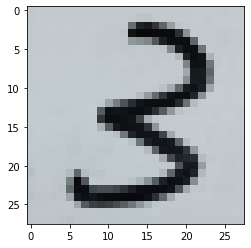

In [ ]:
plt.imshow(img_ina3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#neuralnet_mnist.py
import sys, os
sys.path.append(os.pardir) #親ディレクトファイルをインポートするための設定
import numpy as np
import pickle
# from dataset.mnist import load_mnist

# from common.functions import sigmoid, softmax
def identity_function(x):
    return x

def step_function(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
    
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    grad = np.zeros_like(x)
    grad[x>=0] = 1
    return grad
    
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
         
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)




#neuralnet_mnist.py
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### バッチ処理
- 1枚の画像(28×28=784ピクセル)からどの数字か認識


|  x | w1 | w2 | w3 | Y |
| ---- | ---- | ---- | ---- | ---- |
| 784 | 784*50 | 50*100 | 100*10 | 10 |


- 100枚の画像の写真からそれぞれどの数字か認識


|  x | w1 | w2 | w3 | Y |
| ---- | ---- | ---- | ---- | ---- |
| 100*784 | 784*50 | 50*100 | 100*10 | 10 |


In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 #バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i : i+batch_size] #入力データを100枚づつまとめる
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size]) #正しい答えの数をカウント

print("Accuracy：" + str(float(accuracy_cnt)/len(x)))

Accuracy：0.9352


# 自分の書いた文字をAIに認識させる

(28, 28)
(784,)

0 ： 0.0%
1 ： 0.0%
2 ： 0.0%
3 ： 0.61%
4 ： 0.0%
5 ： 0.01%
6 ： 0.0%
7 ： 0.0%
8 ： 0.37%
9 ： 0.0%



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


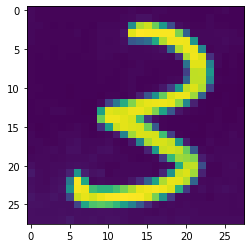

In [ ]:
import sys, os
sys.path.append(os.pardir) #親ディレクトファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
import pickle

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y

# x = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dataset/ina3.png")
# x = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/dataset/ina3.png').convert('L'))
x = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/dataset/ina3-nega.png').convert('L'))
plt.imshow(x) # 入力画像を表示

print(x.shape) #変換前
x = np.array(x).flatten() # 2次元を1次元に
print(x.shape) #変換後
print()

network = init_network() #学習済みモデルを使用
num = predict(network, x) # 関数
num = np.around(num, decimals=2)

for i in range(10):
  print(str(i)+" ： "+str(num[i])+"%")

print()
# print(num)

In [ ]:
print("カレントワーキングディレクトリは[" + os.getcwd() + "]です")

カレントワーキングディレクトリは[/content]です
